In [176]:
import numpy as np 
import pandas as pd
import seaborn as sns
import datetime as dt
index=[("cse",2019),("cse",2018),("cse",2017),("ece",2019),("ece",2018),("ece",2017)]
marks=pd.Series([1,2,3,4,5,6],index=index)
marks[("cse",2019)]

1

In [178]:
index=pd.MultiIndex.from_tuples(index)
marks=pd.Series([1,2,3,4,5,6],index=index)
marks["cse"]
index=pd.MultiIndex.from_product([["cse","ece"],[2019,2018,2017]])
marks=pd.Series([1,2,3,4,5,6],index=index)

In [180]:
marks.unstack()

,2017,2018,2019
cse,3,2,1
ece,6,5,4


In [182]:
df=pd.DataFrame(data=[(1,2),(2,3),(3,4),(4,5),(5,6),(6,7)],index=pd.MultiIndex.from_product([["delhi","mumbai"],[2019,2018,2017]]),columns=["cse","ece"])
df
branch_df2=pd.DataFrame(data=[(1,2,3,4),(2,3,4,5),(3,4,5,6),(4,5,6,7)],index=[2019,2020,2021,2022],columns=pd.MultiIndex.from_product([["delhi","mumbai"],["avg_package","students"]]))
branch_df2
branch_df3=pd.DataFrame(data=[(1,2,3,4),(5,6,7,8),(9,10,11,12),(13,14,15,16),(17,18,19,20),(21,22,23,24),(25,26,27,28),(29,30,31,32)],index=pd.MultiIndex.from_product([["cse","ece"],[2019,2020,2021,2022]]),columns=pd.MultiIndex.from_product([["delhi","mumbai"],["avg_package","students"]]))
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           3        4
    2020           5        6           7        8
    2021           9       10          11       12
    2022          13       14          15       16
ece 2019          17       18          19       20
    2020          21       22          23       24
    2021          25       26          27       28
    2022          29       30          31       32

In [184]:
df.iloc[0:2]
df.iloc[[0,2,3]]
df["cse"]
df.iloc[:3,[0,1]]
df.sort_index(inplace=True)
df.loc[("delhi",2017):("mumbai",2017)] 

cse  ece
delhi  2017    3    4
       2018    2    3
       2019    1    2
mumbai 2017    6    7

In [186]:
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True])
branch_df3.sort_index(level=1,ascending=False)
branch_df3.transpose()
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           3        4
    2020           5        6           7        8
    2021           9       10          11       12
    2022          13       14          15       16
ece 2019          17       18          19       20
    2020          21       22          23       24
    2021          25       26          27       28
    2022          29       30          31       32

In [188]:
df=pd.DataFrame([1],columns=["cse"])
df.melt(var_name="branch",value_name="value")
df=pd.DataFrame({"branch":["cse","ece"],"num_students":[100,200]})
df.melt(id_vars=["branch"])
confirm=pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths=pd.read_csv("time_series_covid19_deaths_global.csv")
confirm=confirm.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="confirm")
death=deaths.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="date",value_name="deaths")
confirm.merge(death,on=["Province/State","Country/Region","Lat","Long","date"])[["date","confirm","deaths"]]

,date,confirm,deaths
0,1/22/20,0,0
1,1/22/20,0,0
2,1/22/20,0,0
3,1/22/20,0,0
4,1/22/20,0,0
...,...,...,...
311248,1/2/23,703228,5708
311249,1/2/23,535,0
311250,1/2/23,11945,2159
311251,1/2/23,334661,4024


In [189]:
tips=sns.load_dataset("tips")
tips.pivot_table(index=["sex","smoker"],columns=["day","time"],values=["total_bill","tip","size"],margins=True)

C:\Users\Shreya Sharma\AppData\Local\Temp\ipykernel_25300\2313767169.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index=["sex","smoker"],columns=["day","time"],values=["total_bill","tip","size"],margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                              tip                   ...                      \
day                 All      Thur              Fri  ...       Sat       Sun   
time                        Lunch Dinner     Lunch  ...    Dinner    Dinner   
sex    smoker                                       ...                       
Male   Yes     2.500000  3.058000    NaN  1.900000  ...  2.879259  3.521333   
       No      2.711340  2.941500    NaN       NaN  ...  3.256563  3.115349   
Female Yes     2.242424  2.990000    NaN  2.660000  ...  2.868667  3.500000   
       No      2.592593  2.437083    3.0  3.000000  ...  2.724615  3.329286   
All            2.569672  2.767705    3.0  2.382857  ...  2.993103  3.255132   

                        total_bill                                          \
day                 All       Thur               Fri                   Sat   
time                         Lunch Dinner      Lunch     Dinner     Dinner   
sex    smoker                                                                
Male   Yes     3.051167  19.171000    NaN  11.386667  25.892000  21.837778   
       No      3.113402  18.486500    NaN        NaN  17.475000  19.929063   
Female Yes     2.931515  19.218571    NaN  13.260000  12.200000  20.266667   
       No      2.773519  15.899167  18.78  15.980000  22.750000  19.003846   
All            2.998279  17.664754  18.78  12.845714  19.663333  20.441379   

                                     
day                  Sun        All  
time              Dinner             
sex    smoker                        
Male   Yes     26.141333  22.284500  
       No      20.403256  19.791237  
Female Yes     16.540000  17.977879  
       No      20.824286  18.105185  
All            21.410000  19.785943  

[5 rows x 21 columns]

<Axes: xlabel='month'>

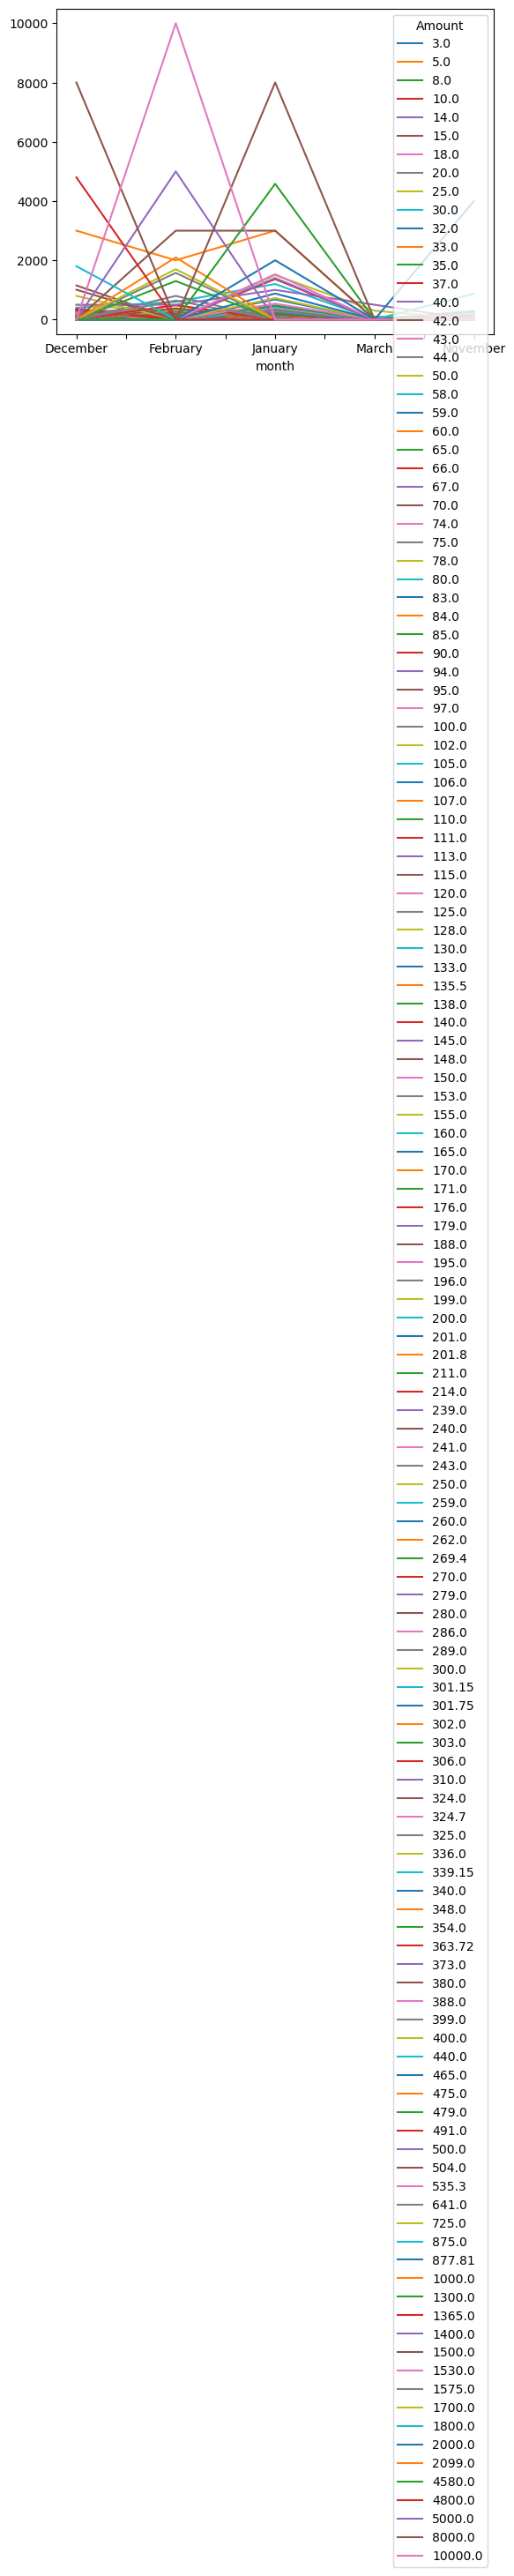

In [190]:
df=pd.read_csv("expense_data.csv")
df["month"]=pd.to_datetime(df["Date"]).dt.month_name()
df.pivot_table(index="month",columns="Amount",values="INR",aggfunc="sum",fill_value=0).plot()

In [193]:
titanic=pd.read_csv("titanic.csv")
titanic["last_name"]=titanic["Name"].str.split(",").str.get(0)
titanic[["title","first_name"]]=titanic["Name"].str.split(",").str.get(1).str.strip().str.split(" ",n=1,expand=True)
titanic["title"].value_counts()
titanic["title"]=titanic["title"].str.replace("Ms.","Miss.")
titanic["title"]=titanic["title"].str.replace("Mlle.","Miss.")
titanic["title"].value_counts()
titanic[titanic["first_name"].str.startswith("A")]
titanic[titanic["first_name"].str.contains("john",case=False)]
titanic[titanic["first_name"].str.contains("^[^aeiouAEIOU].+[aeiouAEIOU]$")]
titanic["first_name"].str[::-1]

0                                sirraH newO
1      )reyahT sggirB ecnerolF( yeldarB nhoJ
2                                      aniaL
3              )leeP yaM yliL( htaeH seuqcaJ
4                              yrneH mailliW
                       ...                  
886                                   sazouJ
887                           htidE teragraM
888                 "eirraC" neleH enirehtaC
889                              llewoH lraK
890                                  kcirtaP
Name: first_name, Length: 891, dtype: object

In [230]:
pd.Timestamp("2025/5/1")
pd.Timestamp("11th May 2025 2:50")
date=dt.datetime(2025,5,11,2,50)
date.year
date.month
date.day
date.hour
date.minute
date.second
index=pd.DatetimeIndex(["2025/5/11","2025/6/11"])
pd.Series([1,2],index=index)
pd.date_range(start="2025/5/11",end="2025/5/20",freq="2D")
pd.date_range(start="2025/5/11",end="2025/5/20",freq="B")
pd.date_range(start="2025/5/11",end="2025/5/20",freq="W")
pd.date_range(start="2025/5/11",periods=20,freq="Y")

C:\Users\Shreya Sharma\AppData\Local\Temp\ipykernel_25300\512409396.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2025/5/11",periods=20,freq="Y")


DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31', '2035-12-31', '2036-12-31',
               '2037-12-31', '2038-12-31', '2039-12-31', '2040-12-31',
               '2041-12-31', '2042-12-31', '2043-12-31', '2044-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

<Axes: xlabel='month_name'>

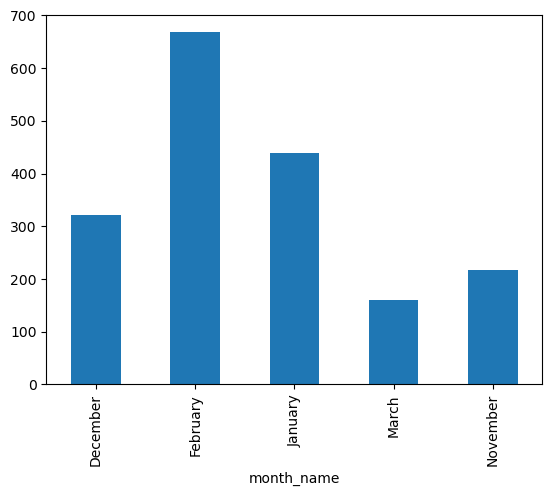

In [236]:
df["Date"]=pd.to_datetime(df["Date"])
df["month_name"]=df["Date"].dt.month_name()
df.groupby("month_name")["INR"].mean().plot(kind="bar")